Росляков Владимир Олегович 


Лабораторная работа номер 1
Вариант 14 

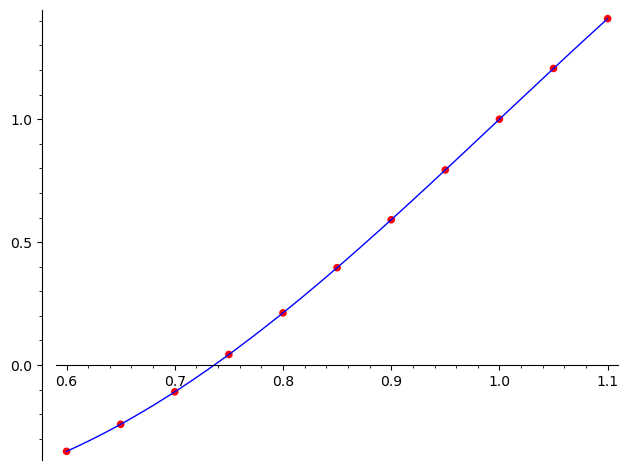

In [43]:

target_x = 0.88
left_border = 0.6
right_border = 1.1
steps_count = 10
step = (right_border - left_border)/steps_count
x_axis = [left_border + i * step for i in range(steps_count + 1)]


x = var('x')
y = x - sin(pi*x)

values = [y(x=i) for i in x_axis]
p = y.plot(xmin=left_border, xmax=right_border)
p += point(zip(x_axis, values), color='red', pointsize=30)
p.show()


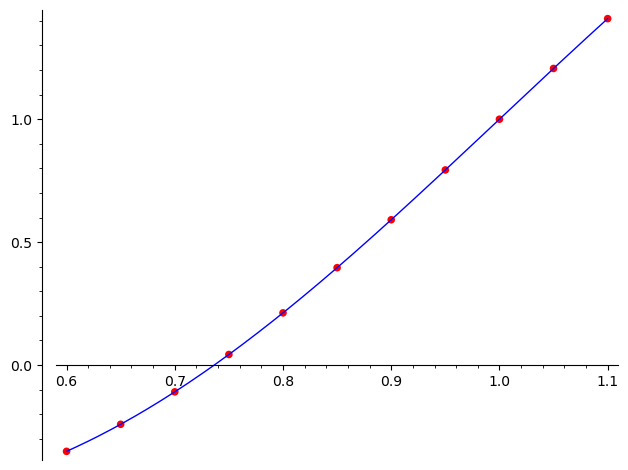

In [44]:

target_x = 0.88
left_border = 0.6
right_border = 1.1
steps_count = 10
step = (right_border - left_border)/steps_count
x_axis = [left_border + i * step for i in range(steps_count + 1)]


x = var('x')
y = x - sin(pi*x)

values = [y(x=i) for i in x_axis]
p = y.plot(xmin=left_border, xmax=right_border)
p += point(zip(x_axis, values), color='red', pointsize=30)
p.show()


In [45]:
"""Функция lagrange конструирует интерполяционный полином Лагранжа n-ого порядка."""

def lagrange(n, values, nodes):
    assert len(nodes) - 1 == n
    polinomial = 0
    for i in range(len(nodes)):
        sum_element = values[nodes[i]]
        for j in range(0, len(nodes)):
            if i!=j:
                sum_element *= (x-x_axis[nodes[j]])/(x_axis[nodes[i]]-x_axis[nodes[j]])
        polinomial += sum_element
    return polinomial


In [46]:
closest_left_node = int((target_x - left_border) / step)
print("Левая граница =",closest_left_node,'\n')

Lagrange_1 = lagrange(1, values, [closest_left_node, closest_left_node+1])
Lagrange_2 = lagrange(2, values, [closest_left_node-1,closest_left_node, closest_left_node+1])
print("Lagrange_1=",Lagrange_1,"\n")
print("Lagrange_2=",Lagrange_2,"\n")

Левая граница = 5 

Lagrange_1= -(20.0000000000000*x - 17.0000000000000)*(sin(0.900000000000000*pi) - 0.900000000000000) - (-20.0000000000000*x + 18.0000000000000)*(sin(0.850000000000000*pi) - 0.850000000000000) 

Lagrange_2= -(20.0000000000000*x - 17.0000000000000)*(10.0000000000000*x - 8.00000000000000)*(sin(0.900000000000000*pi) - 0.900000000000000) - (20.0000000000000*x - 16.0000000000000)*(-20.0000000000000*x + 18.0000000000000)*(sin(0.850000000000000*pi) - 0.850000000000000) - (-10.0000000000000*x + 9.00000000000000)*(-20.0000000000000*x + 17.0000000000000)*(sin(0.800000000000000*pi) - 0.800000000000000) 



In [47]:
R1 = diff(y, x, 2)*(target_x-x_axis[closest_left_node])*(target_x-x_axis[closest_left_node+1])/2
R2 = diff(y, x, 3)*(target_x-x_axis[closest_left_node-1])*(target_x-x_axis[closest_left_node])*(target_x-x_axis[closest_left_node+1])/6

In [48]:
mode = "point_minimum"
if mode == "minimum":
    R1_max = R1.find_local_maximum(x_axis[closest_left_node], x_axis[closest_left_node+1])[0]
    R1_min = R1.find_local_minimum(x_axis[closest_left_node], x_axis[closest_left_node+1])[0]
    R2_min = R2.find_local_minimum(x_axis[closest_left_node-1], x_axis[closest_left_node+1])[0]
    R2_max = R2.find_local_maximum(x_axis[closest_left_node-1], x_axis[closest_left_node+1])[0]
else:
    R1_max = max(R1(x=x_axis[closest_left_node]), R1(x=x_axis[closest_left_node+1]))
    R1_min = min(R1(x=x_axis[closest_left_node]), R1(x=x_axis[closest_left_node+1]))
    R2_max = max(R2(x=x_axis[closest_left_node-1]), R2(x=x_axis[closest_left_node]), R2(x=x_axis[closest_left_node+1]))
    R2_min = min(R2(x=x_axis[closest_left_node-1]), R2(x=x_axis[closest_left_node]), R2(x=x_axis[closest_left_node+1]))
print("R1_max=\t",R1_max,"R1_min=\t", R1_min, "R2_max=\t",R2_max,"R2_min=\t", R2_min, sep = "\n")

R1_max=	
-0.000299999999999999*pi^2*sin(0.900000000000000*pi)
R1_min=	
-0.000299999999999999*pi^2*sin(0.850000000000000*pi)
R2_max=	
-(7.99999999999998e-6)*pi^3*cos(0.900000000000000*pi)
R2_min=	
-(7.99999999999998e-6)*pi^3*cos(0.800000000000000*pi)


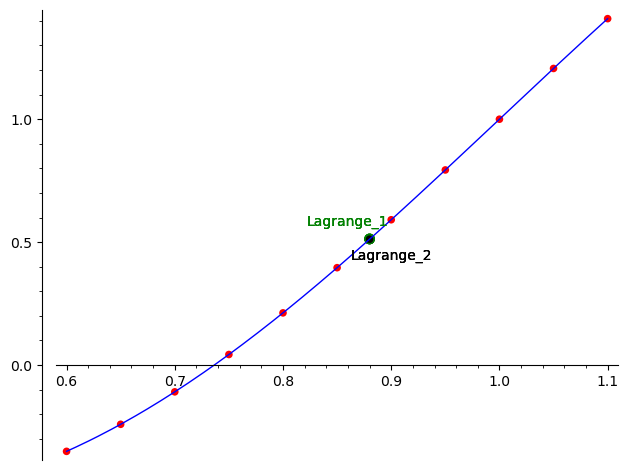

In [58]:
p += point((target_x, Lagrange_1(x=target_x)), color='green', size=60)
p += text('Lagrange_1', (target_x-0.02, Lagrange_1(x=target_x)+0.07), color='green')
p += point((target_x, Lagrange_2(x=target_x)), color='black', size = 30)
p += text('Lagrange_2', (target_x+0.02, Lagrange_1(x=target_x)-0.07), color='black')
p.show()

In [50]:
if R1_min <  y(x=target_x) - Lagrange_1(x=target_x) < R1_max and R2_min < y(x=target_x) - Lagrange_2(x=target_x) < R2_max:
    print("Условия пройдены")

Условия пройдены


In [51]:
def divdif():
    divdifs = [[None for i in range(len(x_axis)-i)] for i in range(len(x_axis))]
    def get_divdif(n, starting_point):
        if divdifs[starting_point][n] is not None:
            return divdifs[starting_point][n]
        if n == 0:
            return values[starting_point]
        divdifs[starting_point][n]=(get_divdif(n-1, starting_point)-get_divdif(n-1, starting_point + 1))/(x_axis[starting_point]-x_axis[starting_point+n])
        return divdifs[starting_point][n]
    return get_divdif

divdiffer = divdif()

In [52]:
def newton(n, starting_point):
    polinomial = 0
    for i in range(starting_point, starting_point+n+1):
        sum_element = divdiffer(i-starting_point, starting_point)
        for j in range(i-starting_point):
            sum_element *= (x-x_axis[starting_point+j])
        polinomial += sum_element
    return polinomial

In [53]:
Newton_1 = newton(1, closest_left_node)
Newton_2 = newton(2, closest_left_node-1)

In [54]:
print(f"\nПолином Лагранжа первого порядка: {Lagrange_1}\n\n")
print(f"\nПолином Лагранжа второго порядка: {Lagrange_2}\n\n")
print(f"При Лагранжа использовании второго порядка: {Lagrange_1(x=target_x)}\n")
print(f"При Лагранжа использовании второго порядка: {Lagrange_2(x=target_x)}\n")
print(f"Погрешность для полинома Лагранжа первого порядка: {abs(Lagrange_1(x=target_x)-y(x=target_x))}\n")
print(f"Погрешность для полинома Лагранжа второго порядка: {abs(Lagrange_2(x=target_x)-y(x=target_x))}\n")


Полином Лагранжа первого порядка: -(20.0000000000000*x - 17.0000000000000)*(sin(0.900000000000000*pi) - 0.900000000000000) - (-20.0000000000000*x + 18.0000000000000)*(sin(0.850000000000000*pi) - 0.850000000000000)



Полином Лагранжа второго порядка: -(20.0000000000000*x - 17.0000000000000)*(10.0000000000000*x - 8.00000000000000)*(sin(0.900000000000000*pi) - 0.900000000000000) - (20.0000000000000*x - 16.0000000000000)*(-20.0000000000000*x + 18.0000000000000)*(sin(0.850000000000000*pi) - 0.850000000000000) - (-10.0000000000000*x + 9.00000000000000)*(-20.0000000000000*x + 17.0000000000000)*(sin(0.800000000000000*pi) - 0.800000000000000)


При Лагранжа использовании второго порядка: -0.600000000000001*sin(0.900000000000000*pi) - 0.399999999999999*sin(0.850000000000000*pi) + 0.880000000000000

При Лагранжа использовании второго порядка: -0.480000000000002*sin(0.900000000000000*pi) - 0.639999999999997*sin(0.850000000000000*pi) + 0.119999999999999*sin(0.800000000000000*pi) + 0.8799999999999

In [55]:
print(f"\nПолином Ньютона первого порядка: {Newton_1}\n")
print(f"\nПолином Ньютона второго порядка: {Newton_2}\n")
print(f"При Ньютона использовании первого порядка: {Newton_1(x=target_x)}\n")
print(f"При Ньютона использовании второго порядка: {Newton_2(x=target_x)}\n")
print(f"Погрешность для полинома Ньютона первого порядка: {abs(Newton_1(x=target_x)-y(x=target_x))}\n")
print(f"Погрешность для полинома Ньютона второго порядка: {abs(Newton_2(x=target_x)-y(x=target_x))}\n")



Полином Ньютона первого порядка: (x - 0.850000000000000)*(-20.0000000000000*sin(0.900000000000000*pi) + 20.0000000000000*sin(0.850000000000000*pi) + 1.00000000000000) - sin(0.850000000000000*pi) + 0.850000000000000


Полином Ньютона второго порядка: (x - 0.800000000000000)*(x - 0.850000000000000)*(-200.000000000000*sin(0.900000000000000*pi) + 400.000000000000*sin(0.850000000000000*pi) - 200.000000000000*sin(0.800000000000000*pi)) + (x - 0.800000000000000)*(-20.0000000000000*sin(0.850000000000000*pi) + 20.0000000000000*sin(0.800000000000000*pi) + 1.00000000000000) - sin(0.800000000000000*pi) + 0.800000000000000

При Ньютона использовании первого порядка: -0.599999999999999*sin(0.900000000000000*pi) - 0.400000000000001*sin(0.850000000000000*pi) + 0.880000000000000

При Ньютона использовании второго порядка: -0.479999999999999*sin(0.900000000000000*pi) - 0.640000000000001*sin(0.850000000000000*pi) + 0.120000000000000*sin(0.800000000000000*pi) + 0.880000000000000

Погрешность для полинома

In [56]:
print(f"Эталонное значние: {y(x=target_x)}\n")

print(f"Lagrange_1-Newton_1={Lagrange_1(x=target_x)-Newton_1(x=target_x)}\n")
print(f"Lagrange_2-Newton_2={Lagrange_2(x=target_x)-Newton_2(x=target_x)}\n")

Эталонное значние: -sin(0.880000000000000*pi) + 0.880000000000000

Lagrange_1-Newton_1=-(2.22044604925031e-15)*sin(0.900000000000000*pi) + (2.22044604925031e-15)*sin(0.850000000000000*pi) + 1.11022302462516e-16

Lagrange_2-Newton_2=-(2.38697950294409e-15)*sin(0.900000000000000*pi) + (3.66373598126302e-15)*sin(0.850000000000000*pi) - (7.35522753814166e-16)*sin(0.800000000000000*pi) - 5.55111512312578e-16

